In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import mdates
import pandas as pd
import datetime as dt
# import matplotlib.dates as mdates

In [63]:
def PlotGraph(data_, title=None, xlabel=None, ylabel=None, xmin=0, xmax=-1, ymin=0, ymax=-1, max_tasks=None, fout="scatter.png", log=False, NDPI=300):
    
    # Create figure and axes
    fig, ax = plt.subplots()

    data_["time_CDT"] = data_["time"] - (5*60*60)
    data_["timestamps_CDT"] = [dt.datetime.fromtimestamp(ts) for ts in data_["time_CDT"]]


    # Make plot
    # ax.scatter(data_["x"], data_["y"], fmt='o', color='r', markersize=4, inestyle='-') 
    # ax.scatter(data_["x"], data_["y"], color='black', s=16, edgecolor='black', marker='o')
    plt.plot(data_["timestamps_CDT"], data_["completed_tasks"], color='blue', linestyle='-', linewidth="2")

    if log: 
        ax.set_yscale("log")

    # Draw a line at 0 hours
    x0 = dt.datetime.fromtimestamp(data_["time_CDT"][0]+(0*3600))
    ax.axvline(x=x0, color='grey', linestyle='--', linewidth=1)
    
    # Draw a line at 6 hours
    x12 = dt.datetime.fromtimestamp(data_["time_CDT"][0]+(11*3600))
    ax.axvline(x=x12, color='grey', linestyle='--', linewidth=1)
    
    # Draw a line at 25 hours
    x25 = dt.datetime.fromtimestamp(data_["time_CDT"][0]+(26.5*3600))
    ax.axvline(x=x25, color='grey', linestyle='--', linewidth=1)

    # Set title, xlabel, and ylabel
    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10)

    # Formatting the x-axis with date labels
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Set major ticks every hour
    
    # Rotate date labels for better readability
    plt.gcf().autofmt_xdate()

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  
    ax.tick_params(axis='y', labelsize=13)  

    # Set axis limits
    if (ymax > ymin):
        ax.set_ylim(ymin, ymax)

    if (xmax > xmin):
        ax.set_xlim(xmin, xmax)

    # Draw a second percent axis if max_tasks is provided
    if max_tasks is not None:
        ax2 = ax.twinx()  # Create a second axes that shares the same x-axis
        percent_completed = (data_["completed_tasks"] / max_tasks) * 100
        ax2.plot(data_["timestamps_CDT"], percent_completed, linewidth=0)
        ax2.set_ylabel("Completion [%]", fontsize=13, labelpad=10)
        ax2.tick_params(axis='y', labelsize=13)
        # ax2.set_ylim(0, 100)  # Set the y-axis limit from 0 to 100%

   # Save the figure
    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    print("---> Written", fout)
    
    plt.tight_layout()
    plt.show()
    
    # Clear memory
    plt.close()

    return

           time  completed_tasks
0    1724884503                0
1    1724884807                8
2    1724885124              189
3    1724885428              289
4    1724885733              301
..          ...              ...
235  1724959664            12267
236  1724959967            12348
237  1724960271            12430
238  1724960575            12504
239  1724960879            12567

[240 rows x 2 columns]


---> 87.3% complete!


---> Written ../Images/MDC2020ae/Monitoring/Jobs.png


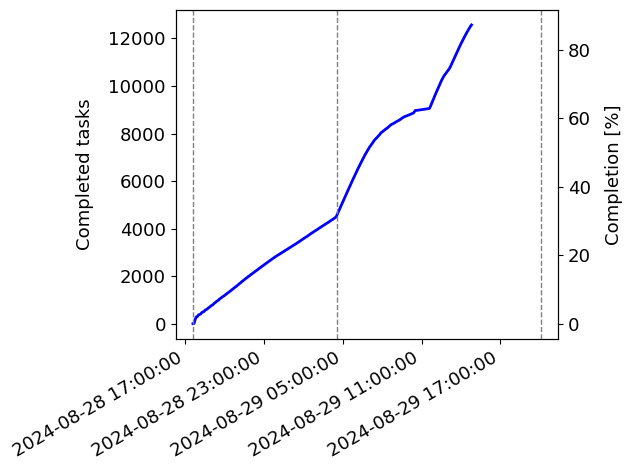

In [90]:
# data1_ = pd.read_csv("../Txt/Monitoring/third_pass.csv")
# data2_ = pd.read_csv("../Txt/Monitoring/third_pass.2.csv")
# data_ = pd.concat([data1_, data2_], ignore_index=True)
# print(data_)

data_ = pd.read_csv("../Txt/Monitoring/completion_log_1724884500.csv")
print(data_)
percentComplete = data_["completed_tasks"].iloc[-1]*100/14400
print(f"\n\n---> {percentComplete:.1f}% complete!\n\n")
PlotGraph(data_, ylabel="Completed tasks", fout="../Images/MDC2020ae/Monitoring/Jobs.png", max_tasks=14400)

In [48]:
# Plot completed tasks versus time.

# data_["time_CDT"] = data_["time"] - (5*60*60)
# times_ = [dt.datetime.fromtimestamp(ts) for ts in data_["time_CDT"]]
